In [1]:
from plot import Plot, PointsCollection, LinesCollection

In [2]:
def testTime(n):
    test = [(uniform(0,1000), uniform(0,1000)) for _ in range(n)]
    points = set()
    for x, y in test:
        points.add(Point(x, y))

    voronoi = Voronoi(points)
    start = time()
    voronoi.solve()
    return time() - start

def testTimeKtimes(n, k):
    res = 0
    for _ in range(k):
        res += testTime(n)
    print(res)
    return res / k

0.4412050247192383
0.544043779373169
1.1436715126037598
2.630143404006958
5.84208345413208
12.11311936378479
26.26185131072998
64.109534740448
126.38896250724792
242.88776326179504


<IPython.core.display.Javascript object>


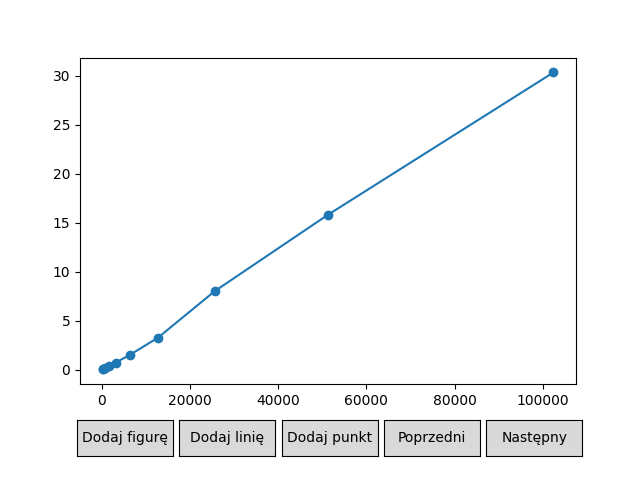

In [4]:
from voronoiV2 import Voronoi
from dataTypes import Point
from random import uniform
from time import time

%matplotlib notebook
lines = []
p = []
howManyTests = 10
results = []
prev = None
n = 100

prev = None

for i in range(howManyTests):
    n *= 2
    n = int(n)

    test = [(uniform(0,1000), uniform(0,1000)) for _ in range(n)]
    points = set()
    for x, y in test:
        points.add(Point(x, y))

    voronoi = Voronoi(points)
    start = time()
    voronoi.solve()
    
    t = testTimeKtimes(n, 8)
    results.append((n, t))
    
    if prev is None:
        prev = (n, t)

    lines.append((prev, (n, t)))
    p.append((n, t))
    prev = (n, t)

def printResults(results):
    for n, t in results:
        print("amountOfPoints:", n)
        print("time:", t)
        print()
    


<IPython.core.display.Javascript object>


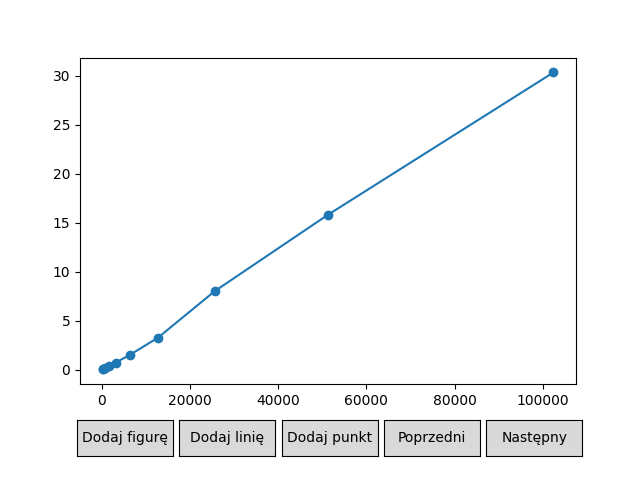

In [5]:
plot = Plot(lines = [LinesCollection(lines)], points = [PointsCollection(p)])
plot.draw(True)

In [7]:
from pprint import pprint

pprint(results)

[(200, 0.055150628089904785),
 (400, 0.06800547242164612),
 (800, 0.14295893907546997),
 (1600, 0.32876792550086975),
 (3200, 0.73026043176651),
 (6400, 1.5141399204730988),
 (12800, 3.2827314138412476),
 (25600, 8.013691842556),
 (51200, 15.79862031340599),
 (102400, 30.36097040772438)]
